In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target
X = X[y < 2, : 2]
y = y[y<2]

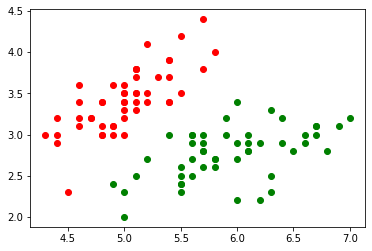

In [65]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.show()

## 使用逻辑回归

In [23]:
from model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

from LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [8]:
log_reg.score(X_test, y_test)

1.0

In [9]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [10]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [13]:
log_reg.interception_

-0.6937719272911228

In [14]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [17]:
x1_plot = np.linspace(4, 8, 1000)

In [18]:
x2_plot = x2(x1_plot)

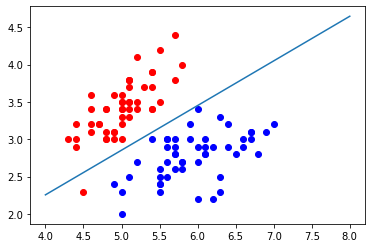

In [22]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

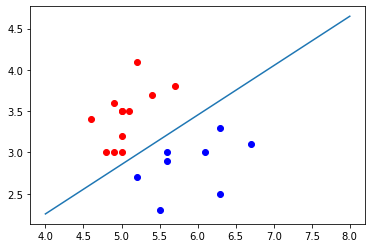

In [27]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

## 决策边界

In [51]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(model, axis):
  
    s1 = np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100))
    s2 = np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)) 
    x0, x1 = np.meshgrid(
        s1, s2
    )
    r1 = x0.ravel()
    r2 = x1.ravel()
    X_new = np.c_[r1, r2]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#ef9a9a', '#fff59d', '#90caf9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

<ipython-input-51-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


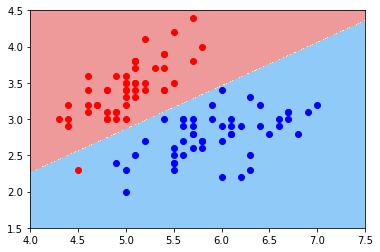

In [53]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

## KNN 决策边界

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn_clf.score(X_test, y_test)

1.0

<ipython-input-51-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


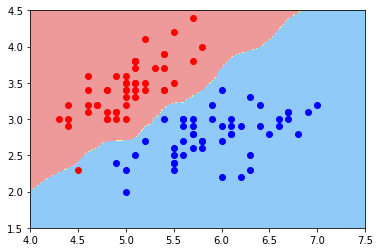

In [57]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [58]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier()

<ipython-input-51-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


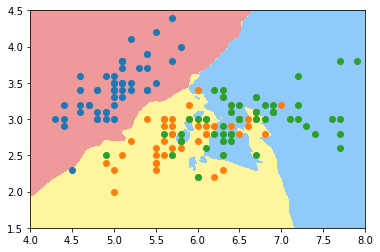

In [63]:
plot_decision_boundary(knn_clf_all,  axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()

<ipython-input-51-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


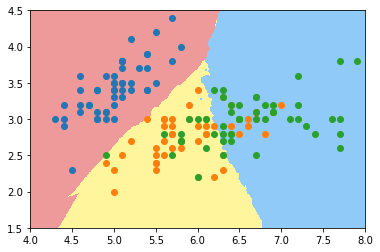

In [64]:
knn_clf_all = KNeighborsClassifier(50)
knn_clf_all.fit(iris.data[:, :2], iris.target)
plot_decision_boundary(knn_clf_all,  axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()